In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
import sys
from drive_path import MY_DRIVE_PATH
sys.path.append(MY_DRIVE_PATH)
os.chdir(MY_DRIVE_PATH)

Mounted at /content/drive


In [2]:
# !pip install blobfile
# !pip install mpi4py

In [3]:
# Import libraries
import torch
from torchvision import transforms
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from utils.models import ModelLoader
from extern.guided_diffusion.guided_diffusion import gaussian_diffusion as gd

/usr/local/lib/python3.8/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


# <u>**Part 1: Import the Image**</u>

In [4]:
IMAGE_PATH = "imgs/golden_retriever.jpg" 

In [5]:
# Read the image and convert BGR to RGB
image = Image.open(IMAGE_PATH)

# Create a transformation composition to resize the image to a 64x64 image,
# and convert it to a torch Tensor.
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.PILToTensor()
])

img_t = transform(image)

Original (256, 256) image:


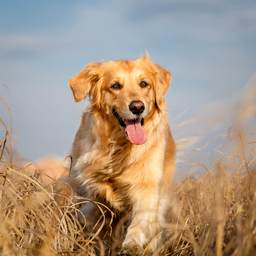

Transformed 3x256x256 image:


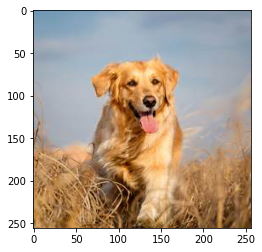

In [6]:
# Plot the chosen original image:
print(f'Original {image.size} image:')
display(image)

print(f'Transformed {"x".join([str(n) for n in img_t.shape])} image:')
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

# **<u>Part 2: Noise the Image Using a Trained Model</u>**

In [7]:
# Load the model and create a corresponding diffusion object:
model_loader: ModelLoader = ModelLoader()
model, diffusion = model_loader.get_model('256x256_uncond')